In [86]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [87]:
%%R

library(tidyverse)

In [88]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('2018_padro_nacionalitat_per_sexe.csv')
head(barris)

glimpse(barris)

Observations: 7,446
Variables: 8
$ Any            <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, …
$ Codi_Districte <dbl> 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, …
$ Nom_Districte  <chr> "Ciutat Vella", "Ciutat Vella", "Ciutat Vella", "Ciuta…
$ Codi_Barri     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Nom_Barri      <chr> "el Raval", "el Barri Gòtic", "la Barceloneta", "Sant …
$ Sexe           <chr> "Home", "Home", "Home", "Home", "Home", "Home", "Home"…
$ Nacionalitat   <chr> "Espanya", "Espanya", "Espanya", "Espanya", "Espanya",…
$ Nombre         <dbl> 11732, 4214, 4607, 6235, 11532, 18692, 15761, 15241, 2…


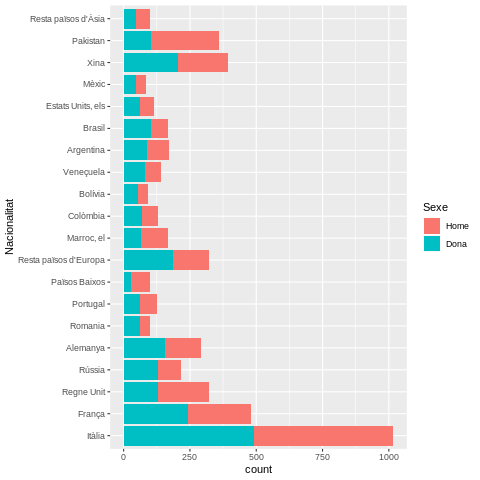

In [128]:
%%R

# useful commands: ungroup, mutate, filter, group_by, summarise

# Let's manually convert a few columns into factors. 
temp <- barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL)) %>% 
                filter(Nom_Barri== 'el Poblenou')%>% filter(Nacionalitat != 'Espanya') %>%
                group_by(Nacionalitat) %>%
                mutate(total_num = sum(Nombre)) %>%
                ungroup %>%
                top_n(40,total_num) %>%
                group_by(Nacionalitat,Sexe) %>%
                mutate(count = sum(Nombre)) %>%
                mutate(ratio = count/total_num) 
                #filter(total_num > 50) %>%
                #arrange(desc(ratio))
                

ggplot(temp,aes(x = Nacionalitat, y = count, fill = Sexe))+geom_col()+coord_flip()

#temp[,c('Nacionalitat','ratio')]
#n <- filter(barris,barris$Nom_Barri == 'el Poblenou') 
#m <- n[n$Nacionalitat == 'Espanyol']
# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!


In [ ]:
temp2 <- barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL)) %>% 
                filter(Nom_Barri== 'el Poblenou')%>% filter(Nacionalitat != 'Espanya') %>%
                group_by(Nacionalitat) %>%
                mutate(total_num = sum(Nombre)) %>%
                ungroup %>%
                group_by(Nacionalitat,Sexe) %>%
                mutate(count = sum(Nombre)) %>%
                filter((total_num >40) & (Sexe=='Home'))


# Problem 3: Classes in Python

In [104]:
# Create a class called "RandomClassifier". 
import numpy as np

class RandomClassifier():
    def __init__(self, probability):
        self.probability = probability
    
    def predict(self, x):
        return np.random.binomial(1,self.probability)


# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

In [103]:

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)

# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

### What is lazy evaluation and when might you use it? (2-3 lines)